<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center">Rapport de projet fil rouge </h1>
<h2 style = "text-align:center">Prédiction de ventes de jeux vidéos - Gaming Sales-Webscrapping</h2>
<h4 style = "text-align:center">Bocar Diop, Didier Law-Hine</h4>
<h4 style = "text-align:center">Promotion Février 2022- Bootcamp - DS</h4>

<hr style="border-width:2px;border-color:#75DFC1">

In [1]:
# Importations des packages necessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import bokeh as bk
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline

<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center">Introduction </h1> 
<hr style="border-width:2px;border-color:#75DFC1">

### Contexte
> Les jeux vidéo sont devenus extrêmement populaires au cours de la dernière décennie. C’est l’un des rares secteurs à avoir été boosté par la pandémie mondiale et ses confinements. Le marché des jeux vidéo représente plus de 300 milliards de dollars de recettes au niveau mondial et voit sa croissance dopée par l’impact de la pandémie et l’essor des jeux mobiles. 
Selon une étude publiée par le cabinet de conseil Accenture, le marché des jeux vidéos compte désormais 2,7 milliards de joueurs sur la planète et a grossi de 500 millions d’utilisateurs au cours des trois dernières années. Il devrait continuer de gonfler, gagnant 400 millions de joueurs d’ici à fin 2023.
>
> L'enjeu pour beaucoup d'entreprise de jeux vidéo, face à cette croissance est: de trouver son public cible plus efficacement, ou de trouver les préférences du public cible en fonction des données d'achat précédentes ou de prévoir les ventes de jeux vidéo.....

### Objectifs
> Dans notre projet, nous tenterons d'implémenter un modèle d'apprentissage automatique capable de prédire les ventes mondiales d'un jeu vidéo en fonction de certaines fonctionnalités telles que son genre, les avis des critiques, la plate forme de diffusion,...
>
> Comme les ventes mondiales d'un jeu vidéo sont une quantité continue, nous allons devoir implémenter dans un premier temps un modèle de régression. La régression est une forme d'algorithme d'apprentissage automatique supervisé qui peut prédire une variable cible (qui doit être une valeur continue) à l'aide d'un ensemble de caractéristiques indépendantes. Dans un second temps, nous prévoyons d'utiliser d'autres algorithmes d'apprentissage automatique dans le but d'améliorer les performances de la prédiction.

### Plan
> * Webscraping des données, Création d'un jeu de données par fusion
> * Analyse Descriptive, Datavisualisation
> * Régression: 1ers essais, Exploration
> * Régression: 2e essais, Feature Selection
> * Régression: 3e essais, analyse de l'impact des outliers
> * Classification
> * Conclusions, perspectives
> * Annexe: codes utilisés pour le webscraping

<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center"> WebScraping des données, Création d'un jeux de données par fusion </h1> 
<hr style="border-width:2px;border-color:#75DFC1">

### Présentation des jeux de données


In [2]:
vg=pd.read_csv("vgsales.csv")
meta=pd.read_csv("metacritic_raw_17853games.csv")
jv=pd.read_csv("jeuxvideocom_csv.csv")

### Jeux de données sur kaggle: 'vg'
> Le dataset fourni est consultable au lien suivant: https://www.kaggle.com/gregorut/videogamesales.
> Nous avons reçu notre ensemble de données de kaggle:
>
> Cet ensemble de données contient une liste de jeux vidéo vendus à plus de 100 000 exemplaires. Il a été généré par un scrap de vgchartz.com.
>
> Les champs incluent :
>
> > * Rang - Classement des ventes globales
> >
> > * Name - Le nom du jeu
> >
> > * Platform - Plate-forme de la sortie des jeux (c'est-à-dire PC, PS4, etc.)
> >
> > * Year - Année de sortie du jeu
> >
> > * Genre - Genre du jeu
> >
> > * Publisher - Editeur du jeu
> >
> > * NA_Sales - Ventes en Amérique du Nord (en millions)
> >
> > * EU_Sales - Ventes en Europe (en millions)
> >
> > * JP_Sales - Ventes au Japon (en millions)
> >
> > * Other_Sales - Ventes dans le reste du monde (en millions)
> >
> > * Global_Sales - Total des ventes mondiales.


In [3]:
display(vg.head())
display(vg.shape)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


(16598, 11)

### Jeux de données de metacritic.com : 'meta'

> Le dataset fourni est obtenu par webscraping à partir de metacritic.com : https://www.metacritic.com/browse/games/score/userscore/all/all/filtered?sort=desc&view=condensed&page=0.
> Il y a 180 pages avec 100 jeux par page pour les 179 premieres pages et 22 jeux pour la 180e page.
> Les jeux sont classés par ordre décroissant de la note "user score".

> Le script python pour le webscraping est fourni en annexe. Les librairies 'requests' et 'BeautifulSoup' ont été utilisées. Les principales difficultés rencontrées furent:
> * Les erreurs de type HTTP: 404 (pages inexistantes) et 503 (trop de requetes de connections en peu de temps)
> * La syntaxe du code à utiliser pour bien cibler les données à extraire (problème de text mining) parmi les pages principales et les sous-pages où les informations sont stockées.
>
> Pour résoudre les problèmes, il a notamment fallu effectuer des recherches approfondies pour intégrer des fonctions et paramètres comme un 'header' plus complet, un 'timeout' et un 'time sleep' et des boucles 'try-except' pour les erreurs HTTP.

> Les données (17844 entrées) concernent plusieurs variables (10 variables) choisies qui sont: 
> * Le titre : `'game_title_MC'`
> * La plateforme: `'platform_MC'`
> * La date de sortie et le nom de l'éditeur : `'releasedate_MC'` et `'publisher_MC'`
> * Les notes des utilisateurs et du personnel de metacritic (jury) ainsi que les nombres de votes associés: `'note_userscore_MC'`/`'num_ratings_userscore_MC'` et `'note_metascore_MC'`/`'num_ratings_metascore_MC'`
> * L'indication (très arbitraire) du nombre de joueurs: `'num_players'`
> * Les différentes évaluations de l'Entertainment Software Rating Board (ESRB), qui estime à quel âge conviennent les jeux vidéos: `'rating_age'`

In [4]:
meta = meta[~meta.index.duplicated(keep='first')]
meta = meta.dropna(subset=['game_title_MC'],axis=0)
meta=meta.drop(columns='Unnamed: 0').reset_index(drop=True)
display(meta.head())
display(meta.shape)

,game_title_MC,platform_MC,releasedate_MC,publisher_MC,note_userscore_MC,num_ratings_userscore_MC,note_metascore_MC,num_ratings_metascore_MC,num_players,rating_age
0,Ghost Trick: Phantom Detective,DS,"Jan 11, 2011",Capcom,9.7,1424.0,83.0,60.0,No Online Multiplayer,T
1,Z.H.P. Unlosing Ranger vs Darkdeath Evilman,PSP,"Oct 25, 2010",NIS America,9.7,894.0,81.0,19.0,NaN,T
2,After Burner Climax,Xbox 360,"Apr 21, 2010",Sega,9.7,963.0,72.0,31.0,NaN,E10+
3,GrimGrimoire,PlayStation 2,"Jun 26, 2007",NIS America,9.7,2405.0,79.0,39.0,1 Player,E10+
4,FAR: Changing Tides,PC,"Mar 1, 2022",Frontier Foundry,9.6,5.0,76.0,12.0,NaN,E


(17844, 10)

### Jeux de données de jeuxvideos.com : 'jv'

> Ce Dataframe est constitué de données recupérées par webscraping à partir du site jeuxvideo.com :
https://www.jeuxvideo.com/tous-les-jeux/ .
> Il y a 2169 pages avec 20 jeux par page. Cependant, il existe des informations non renseignées sur les jeux. Pour être efficace, nous avons recupérer que les jeux dont les informations suivantes sont renseignées: Titre, Note, Date et Plateforme. 

>  Le script python pour le webscraping est fourni en annexe. Pour l'extraction des données sur ce site, la librairie Selenium a été privilégiée.
>
> La démarche habituelle pour scraper est : une requête suivie du parsing de la réponse. Dans la plupart des cas cela marche bien. Mais lorsque l’on a affaire à des sites avec plusieurs redirections ou avec des pop-ups avec lesquels il faut interagir avant d’avoir la page qu’on veut, cette démarche devient beaucoup moins amusante.
L’avantage de Selenium c’est que notre script peut naviguer sur les pages. Du coup, si on voit la donnée dans notre navigateur, on peut la scraper via Selenium.
>
> Grâce à Selenium, nous avons 8515 entrées et 4 variables.
> Comme nous pouvons le remarquer sur le tableau précédent, les données présentent des anomalies sur les 4 colonnes(exemple sur la colonne Titre Lost Ark\nsur PC, il va falloir supprimer \nsur PC). Ainsi pour pouvoir exploiter ces données, il va falloir nettoyer ce dataset.(voir annexe).
> 
> Nous obtenons donc, aprés nettoyage le dataset suivant :



In [5]:
jv=jv.drop(columns='Unnamed: 0').reset_index(drop=True)
display(jv.head())
display(jv.shape)

,Titre,Note,Date,Plateforme
0,Elden Ring,16.4,2022.0,PC PS5 Xbox Series
1,Horizon : Forbidden West,15.8,2022.0,PS5 PS4
2,Lost Ark,12.6,2022.0,PC
3,Gran Turismo 7,16.8,2022.0,PS5 PS4
4,Légendes Pokémon : Arceus,12.7,2022.0,Switch


(8515, 4)

> Malheureusement, on ne pourra pas les fusionner avec le dataset vgsales car :
> > Le titre sur les deux datesets sont dans des langues différentes ( titre vgsales en Anglais et titre dans jv en français).
> > 
> > La date sur le dataset vgsales est décalée d'une années par rapport aux dates jv.
> >
> > Sur vgsales, on a une plate-forme par nom jeu. Alors que sur jv, pour un jeu, on peut avoir plusieurs plate-formes.

> Pour ces raisons, la fusion avec Vgsales ne peut se faire.


### Dataframe 'vgsales_metacritic' par fusion des dataframes 'vgsales' et 'meta', nettoyage du jeux de données

> Une fusion des dataframes `'vgsales'` et `'meta'` sur les colonnes `'Name'` et `'Platform'` a été effectuée pour relier les données des ventes aux notes de critiques.
>
>


In [6]:
vg.Platform[vg.Platform=='PS']='PlayStation'
vg.Platform[vg.Platform=='PS2']='PlayStation 2'
vg.Platform[vg.Platform=='PS3']='PlayStation 3'
vg.Platform[vg.Platform=='PS4']='PlayStation 4'
vg.Platform[vg.Platform=='PS5']='PlayStation 5'
vg.Platform[vg.Platform=='XB']='Xbox'
vg.Platform[vg.Platform=='X360']='Xbox 360'
vg.Platform[vg.Platform=='XOne']='Xbox One'
vg.Platform[vg.Platform=='XS']='Xbox Series X'
vg.Platform[vg.Platform=='GB']='Game Boy'
vg.Platform[vg.Platform=='GBA']='Game Boy Advance'
vg.Platform[vg.Platform=='GC']='GameCube'
vg.Platform[vg.Platform=='PSV']='PlayStation Vita'
vg.Platform[vg.Platform=='N64']='Nintendo 64'
vg.Platform[vg.Platform=='NS']='Switch'
vg.Platform[vg.Platform=='DC']='Dreamcast'
vg.Platform[vg.Platform=='WiiU']='Wii U'

df = pd.merge(vg,meta, how='inner',left_on=['Name','Platform'],right_on=['game_title_MC','platform_MC'])

> La figure suivante décompte par année les entrées (lignes) des deux dataframes `'vgsales'` et `'meta'` ainsi que le dataframe fusionné appelé temporairement `'df'` .
>
> Elle montre que les données de ventes se repartissent entre les années 1980-1990 jusqu'à 2016, alors que les données des notes metacritic se situent dans les années 2000-2020. Les données issues de la fusion (en pointillés rouges) se situent ainsi entre les années 2000-2016. Il y a 6456 entrées mais qui doivent encore être nettoyées par la suite.
>
>

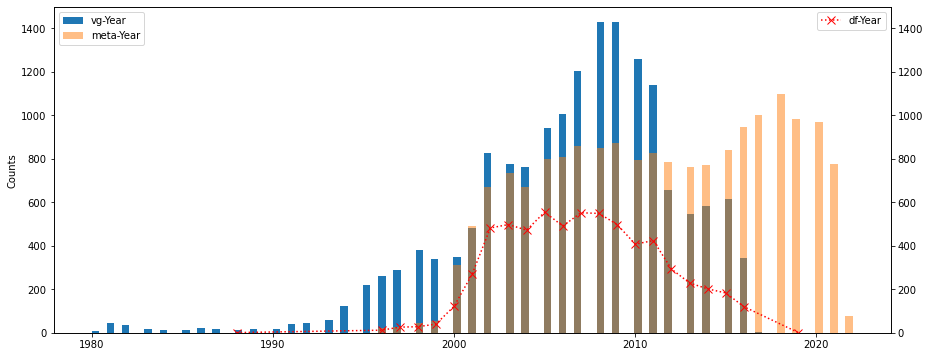

In [7]:
meta['Year_MC'] = pd.to_datetime(meta['releasedate_MC']).dt.year
df['Year_MC'] = pd.to_datetime(df['releasedate_MC']).dt.year
# Substitution par les dates connues
df['Year'][df['Year'].isna()]=df['Year_MC']
df['Name'][df['Year'].isna()]
df['Year_MC']=df['Year_MC'].astype('int')
df['Year']=df['Year'].astype('int')

#
a1=vg['Year'].fillna(0).astype('int')
a2=meta['Year_MC'].fillna(0).astype('int')
a3=df['Year'].fillna(0).astype('int').value_counts().sort_index()
fig, ax1 = plt.subplots(figsize=(15,6))
_, bins, _ = ax1.hist(a1, bins=101, range=[1980, 2022],label='vg-Year')
_ = ax1.hist(a2, bins=bins, alpha=0.5,label='meta-Year')
ax2=ax1.twinx()
_ = ax2.plot(a3, marker='x',color='red',linestyle=':',markersize=8,alpha=1,label='df-Year')
a,b = 0, 1500
ax1.set_ylim(a,b)
ax2.set_ylim(a,b)
ax1.legend(loc='upper left')
ax2.legend(loc=1)
ax1.set_ylabel('Counts');



> Enfin, pour obtenir un jeux de données avec plus de lisibilité, on supprime les variables qui présentent une redondance dans nos données et on renomme certaines variables. Le dataframe fusionné est sauvegardé dans le fichier `'vgsales_metacritic.csv'`

In [8]:
vgsales_metacritic=df.drop(columns=['Rank','game_title_MC','platform_MC', 'releasedate_MC', 'publisher_MC','Year_MC'])
vgsales_metacritic.rename(columns={'note_userscore_MC': 'Note_users', 'num_ratings_userscore_MC': 'N_ratings_users',
                   'note_metascore_MC':'Note_critics','num_ratings_metascore_MC':'N_ratings_critics',
                  'num_players':'N_players','rating_age':'ESRB_ratings'}, inplace=True)
#vgsales_metacritic.to_csv("vgsales_metacritic.csv",index=False)
vgsales_metacritic.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Note_users,N_ratings_users,Note_critics,N_ratings_critics,N_players,ESRB_ratings
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,8.1,478.0,76.0,51.0,No Online Multiplayer,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,8.4,1071.0,82.0,73.0,Up to 12,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,8.2,308.0,80.0,73.0,1-4,E
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,8.5,723.0,89.0,65.0,No Online Multiplayer,E
4,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,6.6,176.0,58.0,41.0,No Online Multiplayer,E


<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center"> Analyse Descriptive,  Datavisualisation </h1> 
<hr style="border-width:2px;border-color:#75DFC1">


In [9]:
df=pd.read_csv("vgsales_metacritic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6456 non-null   object 
 1   Platform           6456 non-null   object 
 2   Year               6456 non-null   int64  
 3   Genre              6456 non-null   object 
 4   Publisher          6452 non-null   object 
 5   NA_Sales           6456 non-null   float64
 6   EU_Sales           6456 non-null   float64
 7   JP_Sales           6456 non-null   float64
 8   Other_Sales        6456 non-null   float64
 9   Global_Sales       6456 non-null   float64
 10  Note_users         6456 non-null   float64
 11  N_ratings_users    6456 non-null   float64
 12  Note_critics       6456 non-null   float64
 13  N_ratings_critics  6456 non-null   float64
 14  N_players          5613 non-null   object 
 15  ESRB_ratings       6414 non-null   object 
dtypes: float64(9), int64(1),

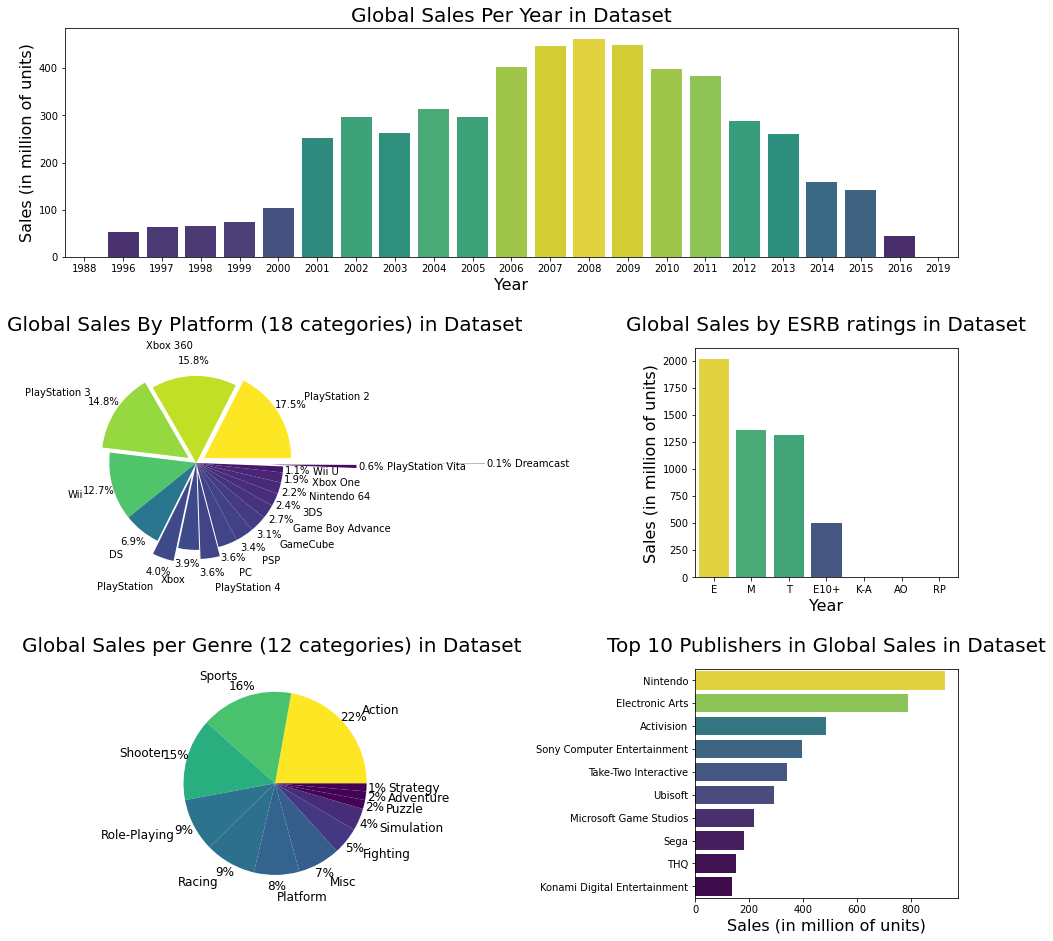

In [10]:
import matplotlib.gridspec as gridspec

f = plt.figure(figsize=(16,16))
gs = gridspec.GridSpec(3, 6)
gs.update(wspace=0.5,hspace=0.4)
ax1 = plt.subplot(gs[0, :6])
ax2 = plt.subplot(gs[1, 0:2], )
ax3 = plt.subplot(gs[1, 4:6], )
ax4 = plt.subplot(gs[2, 0:3], )
ax5 = plt.subplot(gs[2, 4:6], )


# Year
y1 = df.groupby("Year")["Global_Sales"].sum()
y = y1.sort_values()
x = y.index
#colors = sns.color_palette("viridis")
custom_colors = mpl.colors.Normalize(vmin=min(y1), vmax=max(y1))
colors = [mpl.cm.viridis(custom_colors(i)) for i in y1]
#ax1.figsize=(20,20)
sns.barplot(ax=ax1, y = y, x = x,palette=colors)
ax1.set_ylabel(ylabel='Sales (in million of units)', fontsize=16)
ax1.set_xlabel(xlabel='Year', fontsize=16)
ax1.set_title(label='Global Sales Per Year in Dataset', fontsize=20)

#Platform
gamesales_platform = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False)
custom_colors = mpl.colors.Normalize(vmin=min(gamesales_platform), vmax=max(gamesales_platform))
colors = [mpl.cm.viridis(custom_colors(i)) for i in gamesales_platform]
#colors = sns.color_palette("viridis")
explodeTuple = (0.1, 0.0, 0.1, 0.0, 0.0,0.15, 0.0,0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.8, 2.2)
ax2.pie(gamesales_platform, labels=gamesales_platform.index, autopct='%1.1f%%', pctdistance=1.17, labeldistance=1.35,
        colors=colors, explode=explodeTuple, radius=0.95)
central_circle = plt.Circle((0.0, 0.0), 0.5, color='white')
fig = plt.gcf()
plt.gca().add_artist(central_circle)
plt.rc('font', size=12)
ax2.set_title("Global Sales By Platform (18 categories) in Dataset", fontsize=20,x=0.8,y=1.05)

#ESRB ratings
gamesales_esrb = df.groupby("ESRB_ratings")["Global_Sales"].sum().sort_values(ascending=False) 
#colors = sns.color_palette("viridis")
custom_colors = mpl.colors.Normalize(vmin=min(gamesales_esrb), vmax=max(gamesales_esrb))
colors = [mpl.cm.viridis(custom_colors(i)) for i in gamesales_esrb]
sns.barplot(ax=ax3,y = gamesales_esrb, x = gamesales_esrb.index,palette=colors)
ax3.set_ylabel(ylabel='Sales (in million of units)', fontsize=16)
ax3.set_xlabel(xlabel='Year', fontsize=16)
ax3.set_title(label='Global Sales by ESRB ratings in Dataset', fontsize=20,y=1.05)

#Genre
gamesales_genre = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)
custom_colors = mpl.colors.Normalize(vmin=min(gamesales_genre), vmax=max(gamesales_genre))
colors = [mpl.cm.viridis(custom_colors(i)) for i in gamesales_genre]
#colors = sns.color_palette("viridis")
ax4.pie(gamesales_genre, labels=gamesales_genre.index, autopct='%1.0f%%', pctdistance=1.12, labeldistance=1.24, colors=colors)
central_circle = plt.Circle((0.0, 0.0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
ax4.set_title("Global Sales per Genre (12 categories) in Dataset ", fontsize=20,y=1.05)


#Publisher
gamesales_publisher = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(10)
x = gamesales_publisher.index
#colors = sns.color_palette("viridis")
custom_colors = mpl.colors.Normalize(vmin=min(gamesales_publisher), vmax=max(gamesales_publisher))
colors = [mpl.cm.viridis(custom_colors(i)) for i in gamesales_publisher]
sns.barplot(ax=ax5,y = gamesales_publisher.index, x = gamesales_publisher,orient='h',palette=colors)
ax5.set_ylabel('')
ax5.set_xlabel(xlabel='Sales (in million of units)', fontsize=16)
ax5.set_title(label='Top 10 Publishers in Global Sales in Dataset', fontsize=20,y=1.05)


plt.show()

> * Global Sales Per Year in Dataset
> > Le graphique de l'évolution des ventes globales présente une hausse puis une baisse, ce qui ne refléte pas la réalité des faits. En effet, cette variation est due à un décalage des entrées des deux dataframes 'vgsales' et 'meta'. Beaucoup d'études ont montré une tendance à la hausse en terme de ventes et d'utilisateurs.
>
> * Global Sales By Platform (18 categories) in Dataset
> > Ce diagramme circulaire montre que plus de la moitié des ventes est réparti entre 4 plate-forme: PlayStation 2, Xbox 360, PlayStation 3 et Wii.
>
> * Global Sales by ESRB ratings in Dataset
> > La catégorie ESRB (Entertainment Software Rating Board) évalue les jeux vidéos en estimant à quel âge convient ces jeux : Everyone (E), Mature(M), Teen(T), Everyone 10 year + (E10+). La catégorie Kids-to-Adult(KA) est equivalent à E 
et correspond à une ancienne classification. La catégorie Adult Only (AO) est très rare (scène d'extrême violence, nudité, etc.) En mai 2007, on comptait 23 jeux dans cette catégorie. La catégorie (RP) signifie Rating Pending, c'est à dire en attente de classification.
> > Les jeux sont surtout ici répartis selon les 4 catégories E, M, T, E10+. Les 3 autres catégories seront supprimés par la suite (on compte seulement 1 entrée pour ces 3 catégories)
>
> * Global Sales per Genre (12 categories) in Dataset
> > Les ventes en fonction du genre montre une large domination des jeux d'Action,de Sports et Shooter.
> * Top 10 Publishers in Global Sales in Dataset
> > Ce graphique des 10 éditeurs qui vendent le plus montre que Nintendo et Electronic Arts sont largement devant avec des ventes qui dépassent les 800 millions, suivi d'un deuxiéme groupe d'éditeurs(Take-Two Interactive, Activision et Sony Computer Entertainment) avec des ventes qui varient entre 300 et 500 millions. Et enfin, un dernier groupe (Ubisoft,Microsoft Game Studios,...) avec des ventes entre 150 et 300 millions.



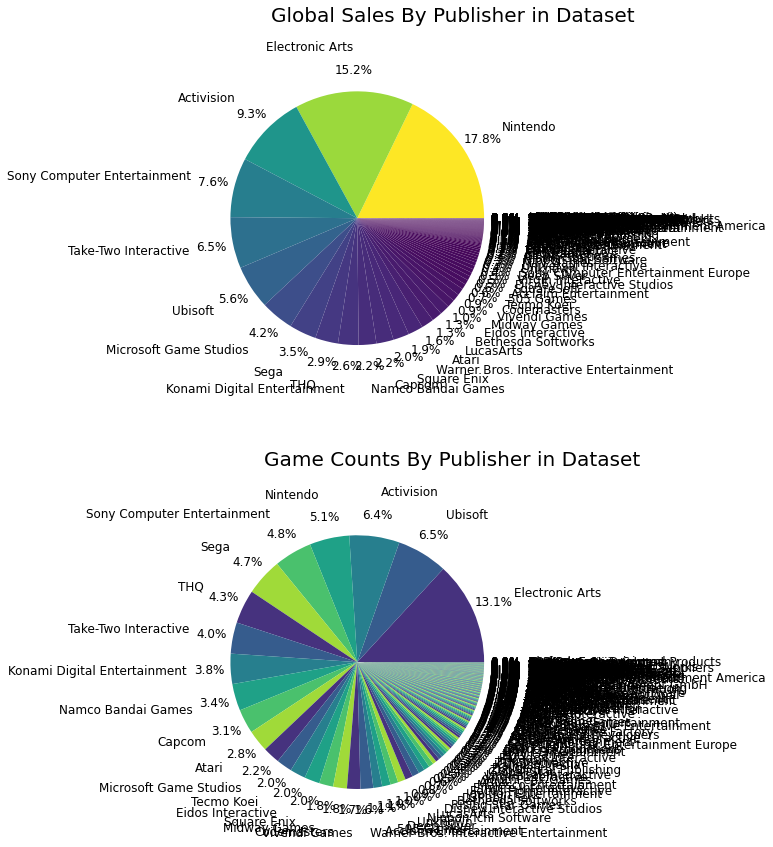

In [11]:
f = plt.figure(figsize=(16,14))
gs = gridspec.GridSpec(2, 3)
gs.update(wspace=0.5,hspace=0.4)
ax1 = plt.subplot(gs[0, 0:3], )
ax2 = plt.subplot(gs[1, 0:3], )


gamesales_publisher = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)
custom_colors = mpl.colors.Normalize(vmin=min(gamesales_publisher), vmax=max(gamesales_publisher))
colors = [mpl.cm.viridis(custom_colors(i)) for i in gamesales_publisher]
#colors = sns.color_palette("viridis")
ax1.pie(gamesales_publisher, labels=gamesales_publisher.index, autopct='%1.1f%%', pctdistance=1.17, labeldistance=1.35,
        colors=colors)
ax1.set_title("Global Sales By Publisher in Dataset", fontsize=20,x=0.8, y=1.1)


gamecount_publisher = df["Publisher"].value_counts(ascending=False)
#custom_colors = mpl.colors.Normalize(vmin=min(gamesales_publisher), vmax=max(gamesales_publisher))
#colors = [mpl.cm.viridis(custom_colors(i)) for i in gamesales_publisher]
colors = sns.color_palette("viridis")
ax2.pie(gamecount_publisher, labels=gamecount_publisher.index, autopct='%1.1f%%', pctdistance=1.17, labeldistance=1.35,
        colors=colors)
ax2.set_title("Game Counts By Publisher in Dataset", fontsize=20,x=0.8, y=1.1)
plt.show()

> * Global Sales By Publisher in Dataset
> > Avec à peu prés 250 éditeurs sur ce dataset, les 10 éditeurs qui vendent le plus regroupent trois quarts des ventes globales.
>
> * Game Counts By Publisher in Dataset
> > Nous pouvons remarquer que les 10 éditeurs qui vendent le plus sont quasiment les plus représentatifs en terme d'occorrence dans notre Dataset.


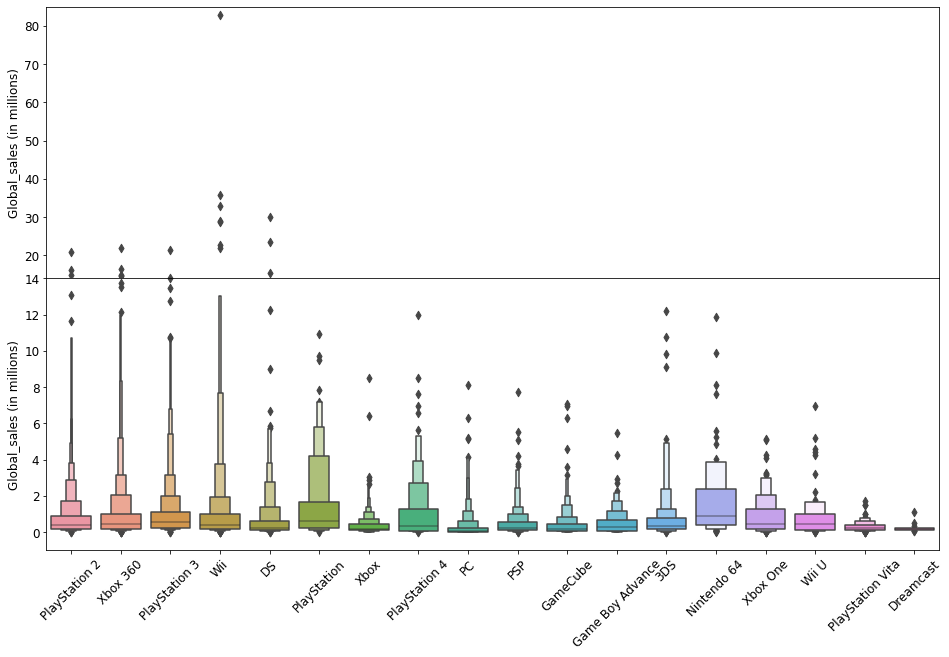

In [16]:
f = plt.figure(figsize=(16,10))
gs = gridspec.GridSpec(2, 3)
gs.update(wspace=0.5,hspace=0.0)
ax1 = plt.subplot(gs[0, 0:3], )
ax2 = plt.subplot(gs[1, 0:3], )

sns.boxenplot(ax=ax1, x='Platform', y='Global_Sales', data=df,order=gamesales_platform.index)
ax1.set_ylim([14,85])
ax1.set(xticklabels=[])  # remove the tick labels
ax1.set(xlabel=None);  # remove the axis label
ax1.set(ylabel='Global_sales (in millions)') ;

sns.boxenplot(ax=ax2, x='Platform', y='Global_Sales', data=df,order=gamesales_platform.index)
ax2.set_ylim([-1,14])
ax2.set_xticklabels(labels=gamesales_platform.index,rotation= 45);
ax2.set(ylabel='Global_sales (in millions)') ;
ax2.set(xlabel=None);  # remove the axis label

> Cette boîte à moustaches donne une idée de la distribution des ventes globales en fonction des différents plate-forme. On peut remarquer la présence de nombreux outliers. Donc, il faudra tenir compte d'éventuels incidents de ces valeurs dans la suite de notre étude.

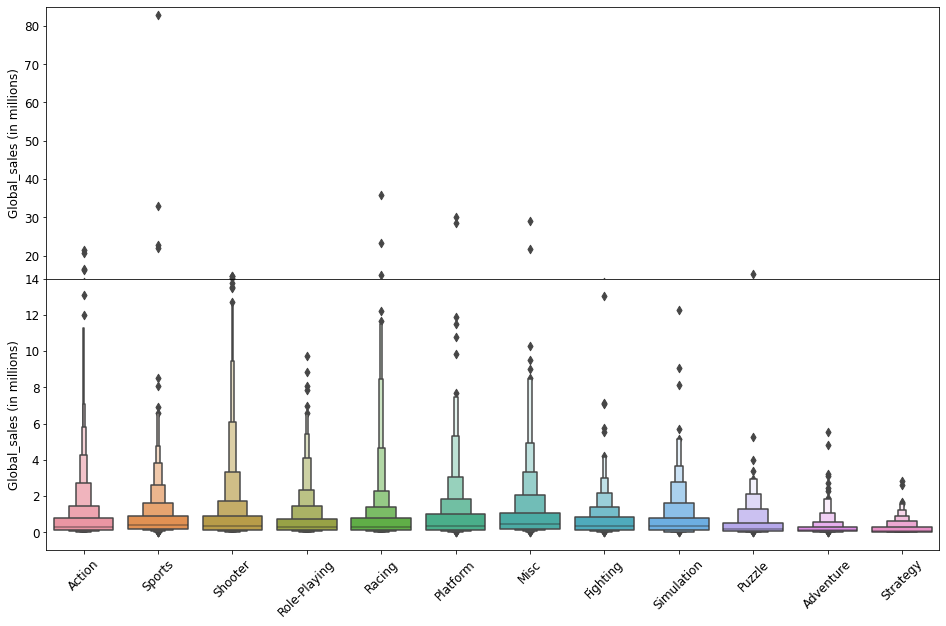

In [17]:
f = plt.figure(figsize=(16,10))
gs = gridspec.GridSpec(2, 3)
gs.update(wspace=0.5,hspace=0.0)
ax1 = plt.subplot(gs[0, 0:3], )
ax2 = plt.subplot(gs[1, 0:3], )

sns.boxenplot(ax=ax1, x='Genre', y='Global_Sales', data=df,order=gamesales_genre.index)
ax1.set_ylim([14,85])
ax1.set(xticklabels=[])  # remove the tick labels
ax1.set(xlabel=None);  # remove the axis label
ax1.set(ylabel='Global_sales (in millions)') ;

sns.boxenplot(ax=ax2, x='Genre', y='Global_Sales', data=df,order=gamesales_genre.index)
ax2.set_ylim([-1,14])
ax2.set_xticklabels(labels=gamesales_genre.index,rotation= 45);
ax2.set(ylabel='Global_sales (in millions)') ;
ax2.set(xlabel=None);  # remove the axis label


> la distribution des ventes globales en fonction des différentes modalités de la variable Genre, comme précédemment montre la présence de valeurs aberrantes.

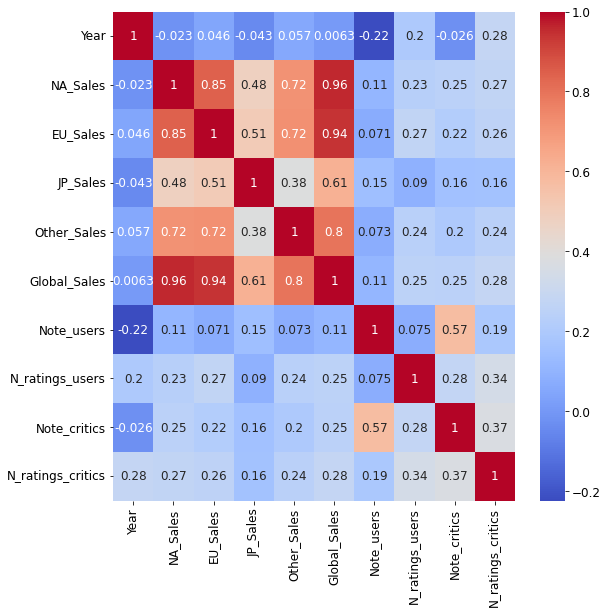

In [18]:
cor = df.corr()
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');

> Matrice de corrélation:
>
> La matrice de corrélation montre que la variable cible Global_Sales est trés corrélée aux variables NA_Sales, EU_Sales, JP_Sales, Other_Sales. Ce qui est normal car Global_Sales résulte de ces derniéres. Ainsi dans le cas d'une régression, il faudra enlever ces variables de l'étude.


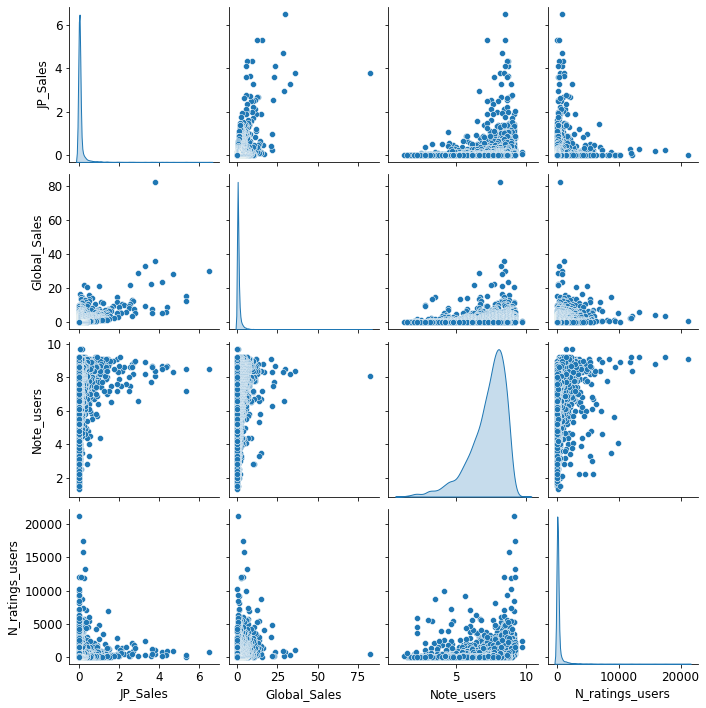

In [19]:
sns.pairplot(df.iloc[:,[7,9,10,11]], diag_kind='kde');

> Ces graphique nous montre dans premier temps qu'il y a de relation linéaire évidente entre les variables. Et par ailleurs, pour la suite il faudra faire une mise en échelle des variables numériques.

<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center"> Regression : 1er essais, Exploration </h1> 
<hr style="border-width:2px;border-color:#75DFC1">


> On va effectuer dans cette partie une série d'opérations classiques de Preprocessing et effectuer nos 1er essais de regression pour explorer nos données dans un premier temps.

### Preprocessing

In [20]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

vgmeta=pd.read_csv("vgsales_metacritic.csv")
display(vgmeta.info())
df=vgmeta.drop(columns=["N_players"])
df.dropna(inplace=True);
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6456 non-null   object 
 1   Platform           6456 non-null   object 
 2   Year               6456 non-null   int64  
 3   Genre              6456 non-null   object 
 4   Publisher          6452 non-null   object 
 5   NA_Sales           6456 non-null   float64
 6   EU_Sales           6456 non-null   float64
 7   JP_Sales           6456 non-null   float64
 8   Other_Sales        6456 non-null   float64
 9   Global_Sales       6456 non-null   float64
 10  Note_users         6456 non-null   float64
 11  N_ratings_users    6456 non-null   float64
 12  Note_critics       6456 non-null   float64
 13  N_ratings_critics  6456 non-null   float64
 14  N_players          5613 non-null   object 
 15  ESRB_ratings       6414 non-null   object 
dtypes: float64(9), int64(1),

None

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Note_users,N_ratings_users,Note_critics,N_ratings_critics
count,6410.000000,6410.000000,6410.000000,6410.000000,6410.000000,6410.000000,6410.000000,6410.000000,6410.000000,6410.000000
mean,2007.026053,0.412223,0.245395,0.069655,0.084298,0.811785,7.249345,240.277847,71.026053,29.976131
std,4.147925,1.007262,0.701602,0.295300,0.277034,2.026246,1.298877,838.788314,13.348227,18.663185
min,1988.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.300000,4.000000,17.000000,7.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,6.600000,14.000000,63.000000,16.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.300000,7.600000,34.000000,73.000000,25.000000
75%,2010.000000,0.410000,0.220000,0.020000,0.070000,0.790000,8.200000,121.000000,81.000000,40.000000
max,2019.000000,41.490000,29.020000,6.500000,10.570000,82.740000,9.700000,21229.000000,99.000000,113.000000


> La colonne `'N_players'` présente un certain nombre de données manquantes et présente un trop grand nombre de modalités qui ne sont pas distinctes les unes des autres. On supprime donc cette variable.
>
> On supprime également la colonne `'Name'` et la colonne `'Year'` car on souhaite prédire indépendament de l'année. 
>
> On supprime aussi les colonnes `'NA_Sales'`, `'JP_Sales'`,`'Other_Sales'`,`'EU_Sales'` très corrélées avec la variable cible `'Global_Sales'`.

In [21]:
data_et_target = df.drop(['Name','Year','NA_Sales','JP_Sales','Other_Sales','EU_Sales'], axis=1)

X_cat = data_et_target.select_dtypes('object')
X_num = data_et_target.select_dtypes(['float64'])

# On "binarise" les variables catégorielles 
X_cat = pd.get_dummies(X_cat)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler #pour les outliers

scaler = MinMaxScaler()
#scaler = RobustScaler()

X = pd.concat([X_cat,X_num], axis=1)
target=X['Global_Sales']
data=X.drop(['Global_Sales'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=42)
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = data.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = data.columns)

X_train.head()

,Platform_3DS,Platform_DS,Platform_Dreamcast,Platform_Game Boy Advance,Platform_GameCube,Platform_Nintendo 64,Platform_PC,Platform_PSP,Platform_PlayStation,Platform_PlayStation 2,...,ESRB_ratings_E,ESRB_ratings_E10+,ESRB_ratings_K-A,ESRB_ratings_M,ESRB_ratings_RP,ESRB_ratings_T,Note_users,N_ratings_users,Note_critics,N_ratings_critics
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.642857,0.000380,0.394737,0.094340
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.738095,0.002216,0.802632,0.160377
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.619048,0.000507,0.592105,0.132075
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.738095,0.002216,0.578947,0.056604
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.880952,0.100424,0.868421,0.254717


### 1ers essais de régression
> Nous allons utiliser quelques algorithmes de regression linéaire (SVR, Lasso CV, HuberRegressor) et l'algorithme KernelRidge CV qui va effectuer une regression de type lineaire dans un espace (noyau) non linéaire.
> Le choix du Lasso est pour permettre de visualiser les features importantes/inutiles aa travers des valeurs des coefficients Lasso. 
> Les algorithmes SVR et HuberRegressor sont réputés efficaces pour des problèmes de regression linéaire avec présence d'outliers. 
> L'algorithme KernelRidgeCV est ici adapté pour résoudre un problème de regression qui n'est pas forcément de type linéaire, comme cela semble être notre cas au vu des figures de corrélation et pairplots. KernelRidge CV devrait aussi gérer la présence d'outliers. Nous tenterons d'aborder ce point plus tard.

In [22]:
from sklearn.svm import SVR                      #SVM/SVR
from sklearn.kernel_ridge import KernelRidge     #KRR
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression

from sklearn.metrics import mean_squared_error

In [23]:
# SVR
svr = SVR()
svr.fit(X_train,y_train)
y_pred_train_svr=svr.predict(X_train)
y_pred_test_svr=svr.predict(X_test)

print('SVR score train :',svr.score(X_train, y_train))
print('SVR score test :', svr.score(X_test, y_test))
print('SVR mse train :', mean_squared_error(y_pred_train_svr, y_train))
print('SVR mse test :', mean_squared_error(y_pred_test_svr, y_test))

SVR score train : 0.1883417446079707
SVR score test : 0.24725417577105546
SVR mse train : 3.5664494004522544
SVR mse test : 2.2157170963619564


Best alpha=0.0005963623316594642
LASSO CV score train : 0.21793368814158232
LASSO CV score test : 0.29217549472572024
LASSO CV mse test : 2.083490611411431


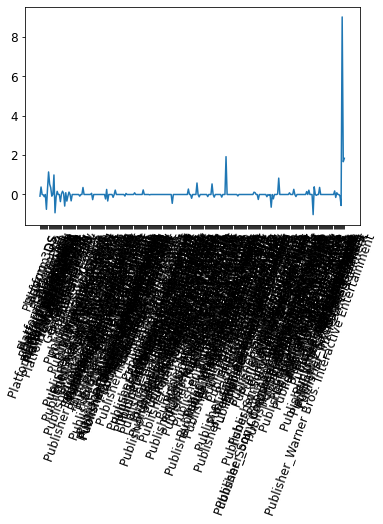

In [24]:
# Lasso CV
alphas = np.logspace(-7, -2, 50)
model_lasso = LassoCV(alphas=alphas).fit(X_train, y_train)

alphas = model_lasso.alphas_

pred_test = model_lasso.predict(X_test)
print(f'Best alpha={model_lasso.alpha_}')
print('LASSO CV score train :', model_lasso.score(X_train, y_train))
print('LASSO CV score test :', model_lasso.score(X_test, y_test))
print('LASSO CV mse test :', mean_squared_error(pred_test, y_test))

lasso_coef = model_lasso.coef_

plt.plot(range(len(data.columns)), lasso_coef)
plt.xticks(range(len(data.columns)), data.columns.values, rotation=70);

In [25]:
# HuberRegressor
epsilon_values = [1.5,5,10,100]
print('Huber Regressor scores:\n')
for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(epsilon=epsilon, max_iter=800)
    huber.fit(X_train, y_train)
    coef_ = huber.coef_ * X_train + huber.intercept_
    y_pred_train_huber=huber.predict(X_train)
    y_pred_test_huber=huber.predict(X_test)
    print(f" epsilon:{epsilon},score train: {huber.score(X_train, y_train)}")
    print(f" epsilon:{epsilon},score train: {huber.score(X_test, y_test)}")
    print(f" epsilon:{epsilon},mse train: {mean_squared_error(y_pred_train_huber, y_train)}")
    print(f" epsilon:{epsilon},mse test: {mean_squared_error(y_pred_test_huber, y_test)}")
    print("\n")

Huber Regressor scores:

 epsilon:1.5,score train: 0.13526448992772955
 epsilon:1.5,score train: 0.19471440063568135
 epsilon:1.5,mse train: 3.799672363287232
 epsilon:1.5,mse test: 2.3703686058880384


 epsilon:5,score train: 0.19875207616045598
 epsilon:5,score train: 0.287256337929754
 epsilon:5,mse train: 3.520706108275749
 epsilon:5,mse test: 2.097970213239408


 epsilon:10,score train: 0.21355515455801288
 epsilon:10,score train: 0.2913124747023095
 epsilon:10,mse train: 3.455660961842396
 epsilon:10,mse test: 2.086030922043287


 epsilon:100,score train: 0.22259133297018985
 epsilon:100,score train: 0.2860297502015182
 epsilon:100,mse train: 3.415955737548308
 epsilon:100,mse test: 2.101580690125711




In [26]:
# Kernel Ridge CV
parametres = {"alpha": [1e0, 0.1, 1e-2, 1e-3], 'kernel':['rbf'], "gamma": np.logspace(-2, 2, 5)}
krr = KernelRidge()
grid_reg = GridSearchCV(estimator=krr, param_grid=parametres)
grille_krr = grid_reg.fit(X_train,y_train)
print(grille_krr.best_params_)

y_pred_train_krr=grille_krr.predict(X_train)
y_pred_test_krr=grille_krr.predict(X_test)

print('KernelRidge CV score train :',grille_krr.score(X_train, y_train))
print('KernelRidge CV score test :', grille_krr.score(X_test, y_test))
print('KernelRidge CV mse train :', mean_squared_error(y_pred_train_krr, y_train))
print('KernelRidge CV mse test :', mean_squared_error(y_pred_test_krr, y_test))

{'alpha': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
KernelRidge CV score train : 0.38151081265638553
KernelRidge CV score test : 0.42004399274156756
KernelRidge CV mse train : 2.7176590353564927
KernelRidge CV mse test : 1.707108029110095


> ### Conclusions : 
> * Le score n'est pas terrible: de l'ordre de 20-30% pour l'ensemble des modèles, à l'exception du modèle Kernel Ridge CV (validation croisée) qui donne ~50%. Cela se justifie par le fait que KernelRidgeCV arrive à mieux fitter les données que les autres algorithmes de régression linéaire, le problème à résoudre n'étant pas idéalement un problème de régression linéaire. A noter également que le nombre d'hyperparamètres à régler est plus important pour le KernelRidgeCV, ce qui facilite en quelque sorte un meilleur fitting (plus de degré de liberté).
> * Nous obtenons des résultats similaires entre une mise à l'échelle de type Min-Max et RobustScaler (typiquement utilisé pour optimisé un dataset avec outliers).
> * Il nous faut supprimer plus de variables car on voit avec la méthode Lasso CV qu'il y a un grand nombre de coefficients nuls, ce qui ralentit le temps d'execution des calculs.

<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center"> Regression : 2e essais, Feature Selection, Clustering</h1> 
<hr style="border-width:2px;border-color:#75DFC1">

> On effectue ici une Feature selection. On va supprimer des colonnes du dataframe, car trop de colonnes signifie trop de coefficients à calculer et donc un allongement du temps de calcul. 
> * Pour ce faire, on va effectuer un *clustering* sur la variable `'Publisher'`. En effet, cette variable présente à elle seule 243 modalités (sur les 284 colonnes de `'X_train'`). On va utiliser pour cela la méthode des KMeans. On va isoler nos clusters en fonction de la proportion des ventes globales `'Global_Sales'` de la variable `'Publisher'` et la proportion du nombre  d'entrées (occurences) de cette même variable `'Publisher'`. D'après les diagrammes en camemberts précédents présentées dans la seciont *Analyse Descriptive, Datavisualisation*, un choix de 10-15 clusters semble tout à fait raisonnable.
> * On  réarrange également la variable `'ESRB_ratings'` en 3 catégories (au lieu de 5 initialement)(https://fr.wikipedia.org/wiki/Entertainment_Software_Rating_Board)


In [27]:
vgmeta=pd.read_csv("vgsales_metacritic.csv")
df=vgmeta.drop(columns="N_players")
df.dropna(inplace=True)

In [28]:
df["ESRB_ratings"][df["ESRB_ratings"]=='K-A']='E'
df = df.drop(df[(df.ESRB_ratings=='AO')|(df.ESRB_ratings=='RP')].index)


### Clustering sur la variable `'Publisher'` , Méthode des KMeans


In [29]:
# Creation d'un dataframe avec 2 colonnes: global sales en fonction de publisher (normalisé),  occurence de publisher (normalisé)

game = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)
total_sum_globalsales_groupbyPublisher=game.sum()

gamesales_norm=game/total_sum_globalsales_groupbyPublisher
gameoccurence_norm = df["Publisher"].value_counts(ascending=False,normalize=True)

df_clus=pd.concat([gamesales_norm, gameoccurence_norm], axis=1,keys=['Gobalsales_norm','Occurence_norm'])
display(df_clus.head())
display(df_clus.shape)

,Gobalsales_norm,Occurence_norm
Nintendo,0.178368,0.050718
Electronic Arts,0.151818,0.132335
Activision,0.093439,0.064295
Sony Computer Entertainment,0.075939,0.048533
Take-Two Interactive,0.064988,0.039950


(243, 2)

In [30]:
from sklearn.cluster import KMeans
# Initialisation du classificateur CAH 
n_clusters=15
cluster = KMeans(n_clusters = n_clusters,random_state=0)
# Apprentissage des données 
cluster.fit(df_clus)
# Labels
labels = cluster.labels_
print(labels)

[ 1  4  9  3 12  7  8  2  2  2 13 13  5  5 13 11 11 10 10 10 10 10  6  6
 14  6 14  6 14  6 14 14  6  6  0 14  0 14 14 14 14 14 14 14 14 14  0  0
  0  0  0  0 14 14  0  0  0  0  0 14  0 14  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0]


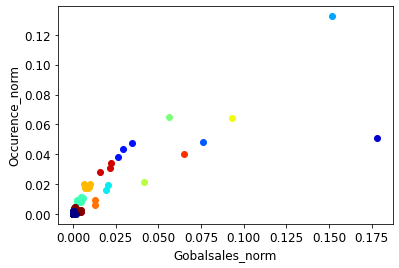

In [31]:
#Visualisation des clusters  
from matplotlib.pyplot import cm
# Liste des couleurs
color = list(cm.jet(np.linspace(0, 1, n_clusters)))
# Graphique du nuage de points attribués au cluster correspondant
for i in range(len(df_clus)):
    plt.scatter(df_clus.iloc[i,0], df_clus.iloc[i,1], color=color[labels[i]])

plt.xlabel('Gobalsales_norm'); 
plt.ylabel('Occurence_norm') ;
plt.show()

In [32]:
# 2 dictionnaires sont créés : s et s2. 
# s va permettre de nous indiquer dans quel cluster se trouve les éditeurs.
# s2 est l'équivalent de s mais les labels sont de type string, ce qui
#  va nous permettre de dichotomiser lors du preprocessing.

s=pd.Series(labels, index=df_clus.index)
publisher_clustlabel_dict=s.to_dict()

s2=pd.Series(labels, index=df_clus.index)
s2=s2.astype(str)
publisher_clustlabel_dict_string=s2.to_dict()


#https://bytes.com/topic/python/answers/854030-clustering-keys-dict-according-its-values
#https://stackoverflow.com/questions/30418481/error-dict-object-has-no-attribute-iteritems
from itertools import groupby

dict_cluster_publisher_label = dict(
(key, [G[1] for G in g]) for (key, g) in
groupby(sorted( (val, key) for (key, val) in publisher_clustlabel_dict.items() ),lambda X: X[0]))

for key,value in dict_cluster_publisher_label.items():
    print(key,value)

0 ['1C Company', '2D Boy', '5pb', 'AQ Interactive', 'ASCII Entertainment', 'Ackkstudios', 'Acquire', 'Activision Blizzard', 'Agatsuma Entertainment', 'Agetec', 'Aksys Games', 'Arc System Works', 'Ascaron Entertainment GmbH', 'Aspyr', 'Avalon Interactive', 'Avanquest', 'BAM! Entertainment', 'Banpresto', 'Big Ben Interactive', 'Black Bean Games', 'Black Label Games', 'Blue Byte', 'Brash Entertainment', 'CCP', 'City Interactive', 'Codemasters Online', 'Compile Heart', 'Conspiracy Entertainment', 'Crave Entertainment', 'DHM Interactive', 'DTP Entertainment', 'Destination Software, Inc', 'Destineer', 'DreamCatcher Interactive', 'Dusenberry Martin Racing', 'EA Games', 'ESP', 'Enix Corporation', 'Enterbrain', 'Ertain', 'Evolved Games', 'Falcom Corporation', 'Flashpoint Games', 'Fox Interactive', 'From Software', 'FuRyu', 'Funbox Media', 'Funcom', 'Funsta', 'GOA', 'GT Interactive', 'Game Factory', 'Gamebridge', 'Gamecock', 'Gathering of Developers', 'Genki', 'Ghostlight', 'Global A Entertainme

### Régression
> On utilise les même algorithmes de regression avec les mêmes paramètres/hyperparamètres à régler , mais cette fois ci sur nos données allegées.

In [33]:
df=df.replace({'Publisher': publisher_clustlabel_dict_string})

In [34]:
data_et_target = df.drop(['Name','Year','NA_Sales','JP_Sales','Other_Sales','EU_Sales'], axis=1)

X_cat = data_et_target.select_dtypes('object')
X_num = data_et_target.select_dtypes(['float64'])

# On "binarise" les variables catégorielles 
X_cat = pd.get_dummies(X_cat)

from sklearn.preprocessing import RobustScaler #pour les outliers
scaler = RobustScaler()

X = pd.concat([X_cat,X_num], axis=1)
target=X['Global_Sales']
data=X.drop(['Global_Sales'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=42)
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = data.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = data.columns)

X_train.head()

,Platform_3DS,Platform_DS,Platform_Dreamcast,Platform_Game Boy Advance,Platform_GameCube,Platform_Nintendo 64,Platform_PC,Platform_PSP,Platform_PlayStation,Platform_PlayStation 2,...,Publisher_8,Publisher_9,ESRB_ratings_E,ESRB_ratings_E10+,ESRB_ratings_M,ESRB_ratings_T,Note_users,N_ratings_users,Note_critics,N_ratings_critics
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.6250,11.826923,1.166667,-0.52
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.3750,-0.278846,-0.333333,-0.64
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.0000,67.230769,0.888889,-0.08
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.4375,-0.288462,-1.222222,-0.56
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.3750,-0.288462,-0.277778,0.24


In [35]:
svr = SVR()
svr.fit(X_train,y_train)
y_pred_train_svr=svr.predict(X_train)
y_pred_test_svr=svr.predict(X_test)

print('SVR score train :',svr.score(X_train, y_train))
print('SVR score test :', svr.score(X_test, y_test))
print('SVR mse train :', mean_squared_error(y_pred_train_svr, y_train))
print('SVR mse test :', mean_squared_error(y_pred_test_svr, y_test))

SVR score train : 0.177100230876715
SVR score test : 0.25457720888288526
SVR mse train : 3.6160791262006886
SVR mse test : 2.1977679898753117


Best alpha=0.0015264179671752333
LASSO CV score train : 0.21298273708386228
LASSO CV score test : 0.2912804263825909
LASSO CV mse test : 2.0895540239119197


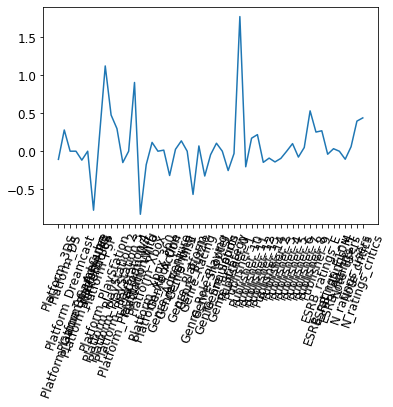

In [36]:
from sklearn.linear_model import LassoCV
alphas = np.logspace(-7, -2, 50)
model_lasso = LassoCV(alphas=alphas).fit(X_train, y_train)

alphas = model_lasso.alphas_

pred_test = model_lasso.predict(X_test)
print(f'Best alpha={model_lasso.alpha_}')
print('LASSO CV score train :', model_lasso.score(X_train, y_train))
print('LASSO CV score test :', model_lasso.score(X_test, y_test))
print('LASSO CV mse test :', mean_squared_error(pred_test, y_test))

lasso_coef = model_lasso.coef_

plt.plot(range(len(data.columns)), lasso_coef)
plt.xticks(range(len(data.columns)), data.columns.values, rotation=70);

In [37]:
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression
epsilon_values = [1.5,5,10,100]
print('Huber Regressor scores:\n')
for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(epsilon=epsilon, max_iter=800)
    huber.fit(X_train, y_train)
    coef_ = huber.coef_ * X_train + huber.intercept_
    y_pred_train_huber=huber.predict(X_train)
    y_pred_test_huber=huber.predict(X_test)
    print(f" epsilon:{epsilon},score train: {huber.score(X_train, y_train)}")
    print(f" epsilon:{epsilon},score train: {huber.score(X_test, y_test)}")
    print(f" epsilon:{epsilon},mse train: {mean_squared_error(y_pred_train_huber, y_train)}")
    print(f" epsilon:{epsilon},mse test: {mean_squared_error(y_pred_test_huber, y_test)}")
    print("\n")

Huber Regressor scores:

 epsilon:1.5,score train: 0.12706999705925204
 epsilon:1.5,score train: 0.1892133916631601
 epsilon:1.5,mse train: 3.835927631419024
 epsilon:1.5,mse test: 2.3904834620790627


 epsilon:5,score train: 0.19082492376720783
 epsilon:5,score train: 0.2848193111747498
 epsilon:5,mse train: 3.555768530260552
 epsilon:5,mse test: 2.108603659034303


 epsilon:10,score train: 0.2050894026461777
 epsilon:10,score train: 0.29123507178446184
 epsilon:10,mse train: 3.493085945751714
 epsilon:10,mse test: 2.0896877451841287


 epsilon:100,score train: 0.21359148374377634
 epsilon:100,score train: 0.2918516176284063
 epsilon:100,mse train: 3.4557251405359746
 epsilon:100,mse test: 2.0878699516631105




In [38]:
parametres = {"alpha": [1e0, 0.1, 1e-2, 1e-3], 'kernel':['rbf'], "gamma": np.logspace(-2, 2, 5)}
krr = KernelRidge()
grid_reg = GridSearchCV(estimator=krr, param_grid=parametres)
grille_krr = grid_reg.fit(X_train,y_train)
print(grille_krr.best_params_)

y_pred_train_krr=grille_krr.predict(X_train)
y_pred_test_krr=grille_krr.predict(X_test)

print('KernelRidge CV score train :',grille_krr.score(X_train, y_train))
print('KernelRidge CV score test :', grille_krr.score(X_test, y_test))
print('KernelRidge CV mse train :', mean_squared_error(y_pred_train_krr, y_train))
print('KernelRidge CV mse test :', mean_squared_error(y_pred_test_krr, y_test))

{'alpha': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
KernelRidge CV score train : 0.5125007870076033
KernelRidge CV score test : 0.46183256020266106
KernelRidge CV mse train : 2.142224113173819
KernelRidge CV mse test : 1.5867064791609167


> ### Conclusions : 
> * On a éliminé 231 features (colonnes du dataframe). 
> * Le score n'est pas vraiment amélioré. Mais le temps de calcul l'est (notamment pour l'algorithme KernelRidgeCV). 
> * Notre intuition est que les modèles ne parviennent pas à mieux fitter les données pour deux possibles raisons: 1) la présence d'un grand nombre d'outliers, c'est à dire des jeux qui ont fait des ventes exceptionelles et 2) le nombre insuffisant de variables qui permettent de discriminer efficacement les jeux entre eux.


<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center"> Regression : 3e essais, Exploration de l'impact des outliers</h1> 
<hr style="border-width:2px;border-color:#75DFC1">

> Nous allons ici étudier l'impact de la présence d'un grand nombre d'outliers dans nos données.
> * Pour cela, on va supprimer de lignes (entrées) du dataframe qui correspondent à des outliers, c'est à dire ici les lignes dont les ventes globales sont très élevées par rapport à l'ensemble des données . Ces outliers apportent probablement de l'imprécision dans nos calculs et on va tenter de s'en aperçevoir.
> * Nous reprenons ci-dessous une des figures présentées dans la partie *Analyse descriptive, Datavisualisation* qui nous montre ces outliers. Nous allons supprimer des lignes au dessus d'un certain palier ou *threshold* qui va correspondre à 5 millions, 2.5 millions ou 1 million d'unités vendues.

In [39]:
vgmeta=pd.read_csv("vgsales_metacritic.csv")
df=vgmeta.drop(columns="N_players")
df.dropna(inplace=True)
df["ESRB_ratings"][df["ESRB_ratings"]=='K-A']='E'
df = df.drop(df[(df.ESRB_ratings=='AO')|(df.ESRB_ratings=='RP')].index)

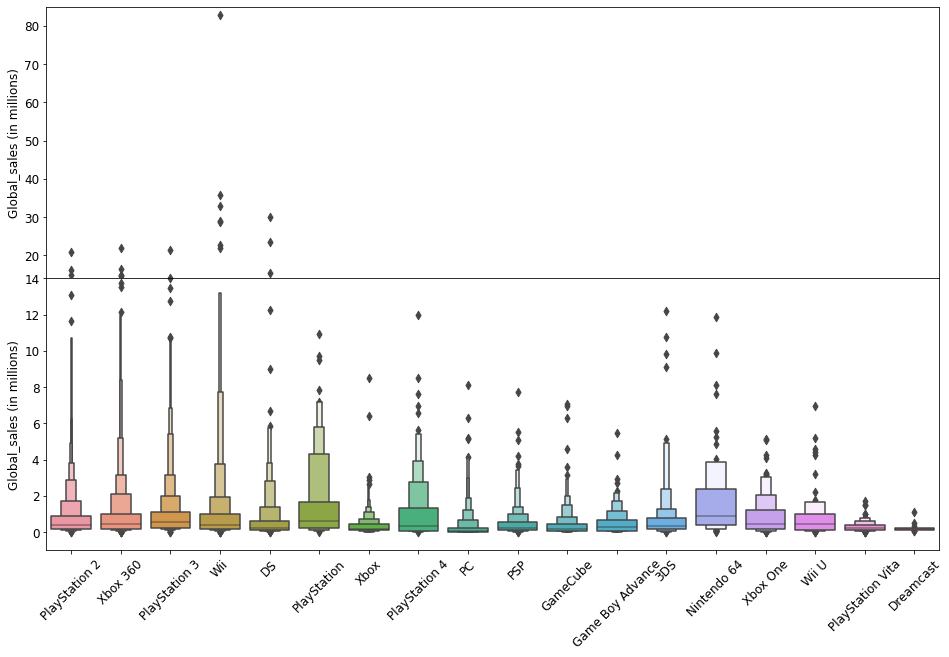

In [40]:
f = plt.figure(figsize=(16,10))
gs = gridspec.GridSpec(2, 3)
gs.update(wspace=0.5,hspace=0.0)
ax1 = plt.subplot(gs[0, 0:3], )
ax2 = plt.subplot(gs[1, 0:3], )

sns.boxenplot(ax=ax1, x='Platform', y='Global_Sales', data=df,order=gamesales_platform.index)
ax1.set_ylim([14,85])
ax1.set(xticklabels=[])  # remove the tick labels
ax1.set(xlabel=None);  # remove the axis label
ax1.set(ylabel='Global_sales (in millions)') ;

sns.boxenplot(ax=ax2, x='Platform', y='Global_Sales', data=df,order=gamesales_platform.index)
ax2.set_ylim([-1,14])
ax2.set_xticklabels(labels=gamesales_platform.index,rotation= 45);
ax2.set(ylabel='Global_sales (in millions)') ;
ax2.set(xlabel=None);  # remove the axis label

In [41]:
df = df.drop(df[df.Global_Sales > 5].index)

> On effectue les mêmes opérations que précedemment: Clustering sur la variable Publisher, Preprocessing, et Regressions

In [42]:
# Clustering 

game = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)
total_sum_globalsales_groupbyPublisher=game.sum()
gamesales_norm=game/total_sum_globalsales_groupbyPublisher
gameoccurence_norm = df["Publisher"].value_counts(ascending=False,normalize=True)
df_clus=pd.concat([gamesales_norm, gameoccurence_norm], axis=1,keys=['Gobalsales_norm','Occurence_norm'])

n_clusters=15
cluster = KMeans(n_clusters = n_clusters,random_state=0)
cluster.fit(df_clus)
labels = cluster.labels_
print(labels)

s2=pd.Series(labels, index=df_clus.index)
s2=s2.astype(str)
publisher_clustlabel_dict_string=s2.to_dict()

dict_cluster_publisher_label = dict(
(key, [G[1] for G in g]) for (key, g) in
groupby(sorted( (val, key) for (key, val) in publisher_clustlabel_dict.items() ),lambda X: X[0]))

[ 2  7  4 13 10  1  9  9 14 14  3  8  8  8  3 11  5  5  5 11  5  5  6  6
  6  6  6 12 12 12 12  6  6 12 12 12 12 12 12 12 12 12 12 12  0  0  0  0
  0  0 12 12  0  0  0  0 12  0  0 12  0 12  0  0  0 12  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0]


In [43]:
# Preprocessing

df=df.replace({'Publisher': publisher_clustlabel_dict_string})

data_et_target = df.drop(['Name','Year','NA_Sales','JP_Sales','Other_Sales','EU_Sales'], axis=1)

X_cat = data_et_target.select_dtypes('object')
X_num = data_et_target.select_dtypes(['float64'])

# On "binarise" les variables catégorielles 
X_cat = pd.get_dummies(X_cat)

from sklearn.preprocessing import RobustScaler #pour les outliers
scaler = RobustScaler()

X = pd.concat([X_cat,X_num], axis=1)
target=X['Global_Sales']
data=X.drop(['Global_Sales'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=42)
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = data.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = data.columns)

In [44]:
# SVR
svr = SVR()
svr.fit(X_train,y_train)
y_pred_train_svr=svr.predict(X_train)
y_pred_test_svr=svr.predict(X_test)

print('SVR score train :',svr.score(X_train, y_train))
print('SVR score test :', svr.score(X_test, y_test))
print('SVR mse train :', mean_squared_error(y_pred_train_svr, y_train))
print('SVR mse test :', mean_squared_error(y_pred_test_svr, y_test))

SVR score train : 0.3920796418047092
SVR score test : 0.380619435483459
SVR mse train : 0.3777607050029187
SVR mse test : 0.4584213348777997


Best alpha=0.00047148663634573947
LASSO CV score train : 0.34428177661690973
LASSO CV score test : 0.3402556651970289
LASSO CV mse test : 0.48829571989317255


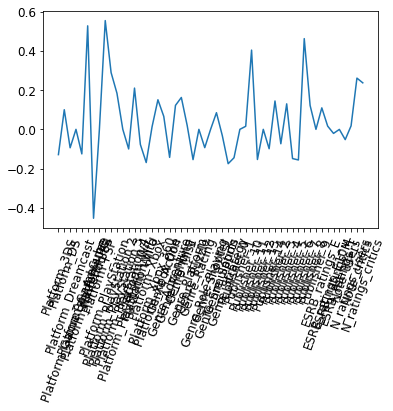

In [45]:
# Lasso CV
from sklearn.linear_model import LassoCV
alphas = np.logspace(-7, -2, 50)
model_lasso = LassoCV(alphas=alphas).fit(X_train, y_train)

alphas = model_lasso.alphas_

pred_test = model_lasso.predict(X_test)
print(f'Best alpha={model_lasso.alpha_}')
print('LASSO CV score train :', model_lasso.score(X_train, y_train))
print('LASSO CV score test :', model_lasso.score(X_test, y_test))
print('LASSO CV mse test :', mean_squared_error(pred_test, y_test))

lasso_coef = model_lasso.coef_

plt.plot(range(len(data.columns)), lasso_coef)
plt.xticks(range(len(data.columns)), data.columns.values, rotation=70);

In [46]:
# HuberRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression
epsilon_values = [1.5,5,10,100]
print('Huber Regressor scores:\n')
for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(epsilon=epsilon, max_iter=800)
    huber.fit(X_train, y_train)
    coef_ = huber.coef_ * X_train + huber.intercept_
    y_pred_train_huber=huber.predict(X_train)
    y_pred_test_huber=huber.predict(X_test)
    print(f" epsilon:{epsilon},score train: {huber.score(X_train, y_train)}")
    print(f" epsilon:{epsilon},score train: {huber.score(X_test, y_test)}")
    print(f" epsilon:{epsilon},mse train: {mean_squared_error(y_pred_train_huber, y_train)}")
    print(f" epsilon:{epsilon},mse test: {mean_squared_error(y_pred_test_huber, y_test)}")
    print("\n")

Huber Regressor scores:

 epsilon:1.5,score train: 0.2802829542343612
 epsilon:1.5,score train: 0.25906348233165744
 epsilon:1.5,mse train: 0.4472309817328169
 epsilon:1.5,mse test: 0.548388385021983


 epsilon:5,score train: 0.34479167526396737
 epsilon:5,score train: 0.3399672526652877
 epsilon:5,mse train: 0.40714536919086564
 epsilon:5,mse test: 0.4885091822866842


 epsilon:10,score train: 0.34482944831020945
 epsilon:10,score train: 0.3403125103553526
 epsilon:10,mse train: 0.4071218970824124
 epsilon:10,mse test: 0.4882536471597789


 epsilon:100,score train: 0.3448294539997969
 epsilon:100,score train: 0.3402724146771645
 epsilon:100,mse train: 0.40712189354691214
 epsilon:100,mse test: 0.48828332312213685




In [47]:
# KernelRidge CV
parametres = {"alpha": [1e0, 0.1, 1e-2, 1e-3], 'kernel':['rbf'], "gamma": np.logspace(-2, 2, 5)}
krr = KernelRidge()
grid_reg = GridSearchCV(estimator=krr, param_grid=parametres)
grille_krr = grid_reg.fit(X_train,y_train)
print(grille_krr.best_params_)

y_pred_train_krr=grille_krr.predict(X_train)
y_pred_test_krr=grille_krr.predict(X_test)

print('KernelRidge CV score train :',grille_krr.score(X_train, y_train))
print('KernelRidge CV score test :', grille_krr.score(X_test, y_test))
print('KernelRidge CV mse train :', mean_squared_error(y_pred_train_krr, y_train))
print('KernelRidge CV mse test :', mean_squared_error(y_pred_test_krr, y_test))

{'alpha': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
KernelRidge CV score train : 0.6564114790135122
KernelRidge CV score test : 0.5463793234239157
KernelRidge CV mse train : 0.21350533860073517
KernelRidge CV mse test : 0.33573768373971274


> ### Conclusions : 
> * En enlevant les outliers, c'est à dire ici les entrées (lignes) du dataframe dont la vente totale `'Global_Sales'` est supérieure à 5 millions d'unités, le score est nettement amélioré. On passe d'un score de 20-30% à 35-40 % pour les algorithmes Lasso, SVR et HuberRegressor, et de 45-50% à 55-65% pour la méthode KernelRidge CV.
> * Nous avons également testé un *threshold* de 2.5 et 1 million d'unités. Les résultats sont similaires à un *threshold* de 5 millions d'unités (résultats non montrées ici)


<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center"> Classification </h1> 
<hr style="border-width:2px;border-color:#75DFC1">

>
> Dans cette partie, nous allons procéder à un autre approche: la classification. Au lieu de prédire une valeur continue, nous allons prédire l'appartenance à une classe. Pour ce faire, nous allons effectuer une classification à l'aide des Support Vector Machine (SVM). 
> Il convient de discrétiser la variable quantitative `'Global_Sales'`. Pour la suite, nous allons discrétiser `'Global_Sales'`:
> * selon les quartiles `'(q = 0, 1, 2, 3)'`.
>
> * selon les déciles `'(q = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9)'`.


In [48]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

vgmeta=pd.read_csv("vgsales_metacritic.csv")
df=vgmeta.drop(columns=["N_players"])
df.dropna(inplace=True);

# Feature Selection 1
df["ESRB_ratings"][df["ESRB_ratings"]=='K-A']='E'
df = df.drop(df[(df.ESRB_ratings=='AO')|(df.ESRB_ratings=='RP')].index)

# Feature Selection 2 - Clustering sur la colonne Publisher avec la méthode KMeans
game = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)
total_sum_globalsales_groupbyPublisher=game.sum()
gamesales_norm=game/total_sum_globalsales_groupbyPublisher
gameoccurence_norm = df["Publisher"].value_counts(ascending=False,normalize=True)
df_clus=pd.concat([gamesales_norm, gameoccurence_norm], axis=1,keys=['Gobalsales_norm','Occurence_norm'])

from sklearn.cluster import KMeans
# Initialisation du classificateur CAH 
n_clusters=15
cluster = KMeans(n_clusters = n_clusters,random_state=0)
# Apprentissage des données 
cluster.fit(df_clus)
# Labels
labels = cluster.labels_

#Creation du dictionnaire pour le preprocessing
s2=pd.Series(labels, index=df_clus.index)
s2=s2.astype(str)
publisher_clustlabel_dict_string=s2.to_dict()


In [49]:
#Preprocessing
df=df.replace({'Publisher': publisher_clustlabel_dict_string})

data_et_target = df.drop(['Name','Year','NA_Sales','JP_Sales','Other_Sales','EU_Sales'], axis=1)

X_cat = data_et_target.select_dtypes('object')
X_num = data_et_target.select_dtypes(include = ['float64','int64'])

X_cat = pd.get_dummies(X_cat)

X = pd.concat([X_cat,X_num], axis=1)

from sklearn.model_selection import train_test_split

X.Global_Sales = pd.qcut(data_et_target.Global_Sales, labels = [0,1,2,3],q = 4)
#X.Global_Sales = pd.qcut(data_et_target.Global_Sales, labels = [0,1,2,3,4,5,6,7,8,9],q = 10)

target = X.Global_Sales
X = X.drop('Global_Sales', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2,random_state=789)

from sklearn.preprocessing import RobustScaler #pour les outliers
scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [50]:
from sklearn import svm
from sklearn.metrics import classification_report

clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score_clf  = clf.score(X_test,y_test)
print("Le score de performance ('accuracy'):",score_clf)
print("\n")
cm = pd.crosstab(y_test, y_pred, rownames = ['classe Réelle'], colnames =['classe Prédite'])
print(cm)
print("\n")
print(classification_report(y_test, y_pred))

Le score de performance ('accuracy'): 0.46879875195007803


classe Prédite    0    1    2    3
classe Réelle                     
0               187   91   33    7
1               107  101  108   20
2                44   70  135   63
3                17   17  104  178


              precision    recall  f1-score   support

           0       0.53      0.59      0.56       318
           1       0.36      0.30      0.33       336
           2       0.36      0.43      0.39       312
           3       0.66      0.56      0.61       316

    accuracy                           0.47      1282
   macro avg       0.48      0.47      0.47      1282
weighted avg       0.48      0.47      0.47      1282



> Nous obtenons les résultats suivants avec la classification selon les déciles.

In [ ]:
Le score de performance ('accuracy')avec q = 10: 0.23322932917316694


classe Prédite   0  1   2   3  4   5   6  7   8   9
classe Réelle                                      
0               86  8  26   8  2   4   9  0   1   5
1               39  5  25  23  0   9  14  0   0   2
2               24  6  36  22  1  16  20  0   1   1
3               15  6  36  19  3  16  35  0   6   3
4               15  3  21  24  6  14  28  2   5   4
5               13  4  24  12  1  12  33  1   8   6
6                4  2  14  11  7  18  53  2  14   9
7                5  2  10   8  5  10  64  4  22  13
8                7  0   3   1  2  12  48  1  20  28
9                3  0   1   0  1   4  21  1  26  58  


              precision    recall  f1-score   support

           0       0.41      0.58      0.48       149
           1       0.14      0.04      0.07       117
           2       0.18      0.28      0.22       127
           3       0.15      0.14      0.14       139
           4       0.21      0.05      0.08       122
           5       0.10      0.11      0.10       114
           6       0.16      0.40      0.23       134
           7       0.36      0.03      0.05       143
           8       0.19      0.16      0.18       122
           9       0.45      0.50      0.48       115

    accuracy                           0.23      1282
   macro avg       0.24      0.23      0.20      1282
weighted avg       0.24      0.23      0.21      1282


> Nous reprenons le modéle avec q = 4, et nous introduisons des paramétres contenant les valeurs possibles prises pour le paramètre `'C:[0.1,1,10]'`, pour`' kernel: ['rbf', 'linear','poly']'` et pour `'gamma:[0.001, 0.1, 0.5]'`.
Grâce à la fonction GridSearchCV() du module model_selection, les paramètres sont croisés et un modèle est créé puis évalué pour chaque combinaison possible par validation croisée.

In [25]:
from sklearn import model_selection

parametres = {'C':[0.1,1,10], 'kernel': ['rbf', 'linear','poly'], 'gamma':[0.001, 0.1, 0.5]}
grid_clf = model_selection.GridSearchCV(clf, param_grid = parametres )

grille = grid_clf.fit(X_train, y_train)


In [26]:
print(grid_clf.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [35]:
y_pred = grid_clf.predict(X_test)

cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(cm)
print("\n")
print(classification_report(y_test, y_pred))

Classe prédite    0    1    2    3
Classe réelle                     
0               189   94   28    7
1               102  131   89   14
2                29   66  145   72
3                 9   22   71  214


              precision    recall  f1-score   support

           0       0.57      0.59      0.58       318
           1       0.42      0.39      0.40       336
           2       0.44      0.46      0.45       312
           3       0.70      0.68      0.69       316

    accuracy                           0.53      1282
   macro avg       0.53      0.53      0.53      1282
weighted avg       0.53      0.53      0.53      1282



> ### Conclusions : 
> * Le modéle SVM avec des paramétres par défaut donne un score de 46%.Mais on peut remarquer, un f1-score dépassant les 50% pour les labels 0 et 3.Contrairement aux labels 0 et 3, les labels 1 et 2 sont trés mal classés avec une faible précision. Malgrés ses scores, le modéle qui discrétise Global_Sales selon les quartiles(avec précision de 46%) est bien meilleur que celui qui discrétise selon les déciles(avec une précision de 23%).
> * Les résultats semblent meilleurs avec l'ajout des paramètres et la validation croisée. La matrice de confusion est meilleure que celle obtenue sans les paramétres.Et on a une amélioration de la précision et des f1-score. Donc on peut dire que Le tuning d'hyperparamètres a amélioré la précision du modéle passant de 46% à 53%.


<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center"> Conclusions, Perspectives </h1> 
<hr style="border-width:2px;border-color:#75DFC1">

> * La difficulté principale de ce projet était d'extraire des données pour compléter le jeu de données initialement fourni sur les quantités de ventes de jeux. Il nous est nécessaire de préciser ici que cette étape fondamentale de webscraping du projet nous a pris un temps considérable, la difficulté résidant dans le code à écrire pour contourner les problèmes tels que les erreurs HTTP et le text mining.
> * Nous avons extrait des données de sites webs par scraping. Ces données complémentaires consistaient principalement en des notes de critiques que nous avons tenté de lier aux ventes de jeux. Nous avons obtenu un jeu de données final avec 6400 observations, ce qui nous semble en premier abord suffisant. 
> * A l'issue de nos premiers essais de régression, nous avons constaté un temps de calcul long pour l'algorithme de SVR par validation croisée et un nombre très important de coefficients nuls avec l'algorithme Lasso, ce qui nous a motivé par la suite à reduire drastiquement le nombre de features. Cela s'est fait sur la variable `'Publisher'` car celle ci avait 243 modalités (sur les 284 colonnes au total).
> * Nous avons également vu que le modèle KernelRidge CV donnait un meilleur score (R^2= 0.4) que les autres algorithmes de type régression linéaire. Cela s'interprète par le rendu non-linéaire du modèle et du plus grand nombre d'hyperparamètres en jeu.
> * Après nos deuxième essais, le score restait inchangé. Cela signifie simplement que l'élimination des features dans notre cas ne sert qu'à rendre l'execution du calcul plus rapide. On s'est ainsi posé la question de l'impact des outliers dans notre jeux de données qui contribuaient à diminuer la qualité de la régression.
> * Nos troisièmes essais ont donc tout simplement été éffectués en supprimant des entrées (lignes) du jeu de données qui correspondaient à une valeur de threshold au dessus de laquelle on ne tenait pas compte de ces entrées. Nous avons essayé un threshold à 5 millions d'unités vendues (Global Sales), à 1.25 million et à 2.5 millions, qui donnaient tous un score du même ordre de grandeur (R^2= 0.6)
>
>
> Les prochaines étapes à effectuer pour améliorer le score sont l'intégration de nouvelles features qui permettent de discriminer plus efficacement les jeux vidéos.
> En effet, notre intuition est que le nombre de features discriminantes est insuffisante au regard du nombre de jeux. Nous avons probablement plusieurs jeux par exemple qui appartiennent aux  mêmes catégories de Genre (Action), Plateforme (Playstation), du même Editeur (Activision) mais dont les notes de critique (typiquement 7/10-8/10) très proches ne permettent pas suffisamment de discriminer les ventes globales qui sont elles relativement plus distinctes. Un autre cas de figure est que des jeux pourraient appartenir à des même catégories de Genre, Plateforme et Editeur avec des notes très distinctes (5/10 vs 8/10, par exemple) et pourraient donner des ventes similaires, ce qui ne permet pas encore une fois de discriminer ces jeux efficacement et d'améliorer le score.
>
>
> Pour cela nous pensons à 2 pistes:
> * L'intégration d'une feature qui donne le nombre de récompenses obtenus pour un jeu. Cela peut se faire en webscrapant le site : https://ultimatepopculture.fandom.com/wiki/List_of_Game_of_the_Year_awards
> Les algorithmes de regréssion pourraient ainsi probablement discriminer plus efficacement à l'aide de cette variable supplémentaire. Mais on pourrait s'attendre à ce que cette variable discrimine simplement deux catégories de jeux : les outliers (très recompensés) et le reste des jeux (pas recompensés) qui donne typiquement moins d'un million de ventes et qui représente la majorité des jeux présents dans le dataset. Ainsi, cette feature servirait à réintégrer nos outliers dans notre jeux de données.
> * Pour obtenir encore un meilleur score, il faudrait une ou plusieurs features qui discrimineraient nos données dont les ventes se situent vers les 1-2 millions d'unités (majorité des jeux d'après ce que montre les boites à moustaches). Une piste potentielle serait de séparer les données en 2 catégories : des jeux qui appartiendraient à une série de jeux (par exemple, Fifa 2000, 2001, 2002, etc.) et des jeux qui ne le sont pas. On peut s'attendre à ce que les jeux qui appartiennent à une série de jeux sont ceux qui cartonnent (ventes globales plus importantes) et on pourrait dejà effectuer une regression sur cette catégorie.

<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center"> Annexes </h1> 
<hr style="border-width:2px;border-color:#75DFC1">

>
> Nous fournissons les scripts qui nous ont permis de webscrapper les sites metacritic.com et jeuxvideos.com dans les fichiers 'scraping_jeux_video.ipynb' (jeuxvideos.com) et 'Main_metacritic_webscraping_avec_requests.py' (metacritic.com)